In [1]:
# %pip install opencv-python


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile
import os
import urllib.request

import cv2

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

2024-10-17 23:10:57.908444: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 23:10:57.922992: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 23:10:57.927480: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 23:10:57.939073: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-17 23:10:58.704441: W tensorflow/compiler/tf2

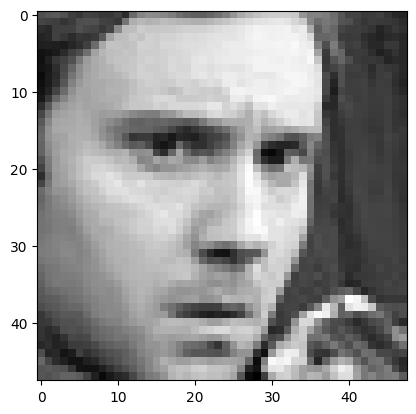

In [3]:
#example image
img = cv2.imread('./data/Images/train/Angry/0.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [4]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        # horizontal_flip=True,
                                        fill_mode='nearest')
training_dataset = training_generator.flow_from_directory('./data/Images/train',
                                                            target_size = (48, 48),
                                                            batch_size = 16,
                                                            class_mode = 'categorical',
                                                            color_mode = 'grayscale')   


Found 28709 images belonging to 7 classes.


In [5]:
training_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [6]:
training_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

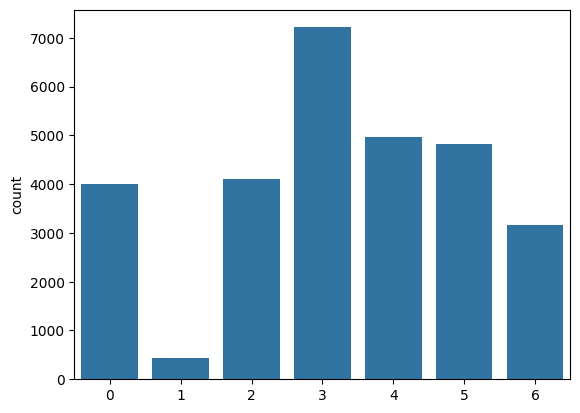

In [7]:
sns.countplot(x = training_dataset.classes);

In [8]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('./data/Images/validation',
                                                target_size = (48, 48),
                                                batch_size = 16,
                                                class_mode = 'categorical',
                                                color_mode = 'grayscale')

Found 3589 images belonging to 7 classes.


In [9]:

model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())  

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) 


model.add(layers.Dense(7, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))


model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # Для отображения структуры модели


/home/developer/anaconda3/envs/cv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729195859.955992   28004 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729195860.001600   28004 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1729195860.001854   

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 23, 23, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 1, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 423,559 (1.62 MB)

 Trainable params: 422,599 (1.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [10]:
# Освобождение GPU памяти
K.clear_session()

# Вызов очистки кэша памяти
tf.compat.v1.reset_default_graph()

# Дополнительно можно очистить память вручную с помощью метода:
tf.keras.backend.clear_session()

In [11]:
# Обучение модели
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.00001)

history = model.fit(training_dataset, batch_size=8,
                    epochs=100, 
                    validation_data=test_dataset,
                    callbacks=[early_stopping]
                    )



Epoch 1/100


/home/developer/anaconda3/envs/cv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729195862.833913   28125 service.cc:146] XLA service 0x707a880146c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729195862.833933   28125 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 3GB, Compute Capability 6.1
2024-10-17 23:11:02.883775: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-17 23:11:03.135524: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907

   9/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.1216 - loss: 2.9441   

2024-10-17 23:11:05.976836: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_6', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1729195865.992924   28125 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  42/1795 ━━━━━━━━━━━━━━━━━━━━ 1:58 67ms/step - accuracy: 0.1310 - loss: 2.8661

2024-10-17 23:11:08.570508: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_6', 4 bytes spill stores, 12 bytes spill loads



1795/1795 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.2093 - loss: 2.2754 - val_accuracy: 0.3040 - val_loss: 1.8553
Epoch 2/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2668 - loss: 1.9058 - val_accuracy: 0.2959 - val_loss: 1.8556
Epoch 3/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2980 - loss: 1.8154 - val_accuracy: 0.3497 - val_loss: 1.7305
Epoch 4/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3267 - loss: 1.7414 - val_accuracy: 0.3887 - val_loss: 1.6333
Epoch 5/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3611 - loss: 1.6695 - val_accuracy: 0.4004 - val_loss: 1.6195
Epoch 6/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3805 - loss: 1.6205 - val_accuracy: 0.4054 - val_loss: 1.6152
Epoch 7/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4000 - loss: 1.5670 - val_accuracy: 0.4299 - val_loss: 1.5625
Epoch 8/100
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4164 - loss: 1.533

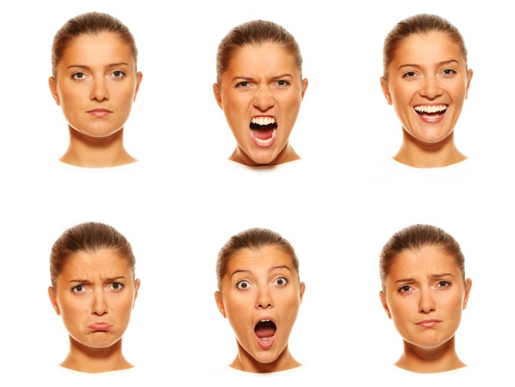

In [12]:
image = cv2.imread('./data/faces.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [13]:
url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml"

cascade_path = './haarcascade_frontalface_default.xml'
urllib.request.urlretrieve(url, cascade_path)

detector_face = cv2.CascadeClassifier(cascade_path)

In [14]:
deteccoes = detector_face.detectMultiScale(image)
deteccoes

array([[ 54,  35, 122, 122],
       [481,  35, 118, 118],
       [475, 308, 122, 122],
       [ 52, 309, 123, 123],
       [265, 303, 124, 124],
       [487,  88, 118, 118],
       [266,  48, 122, 122]], dtype=int32)

In [15]:
test_dataset.class_indices.keys()

dict_keys(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


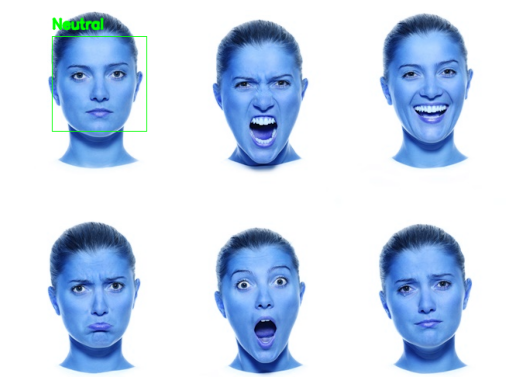

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


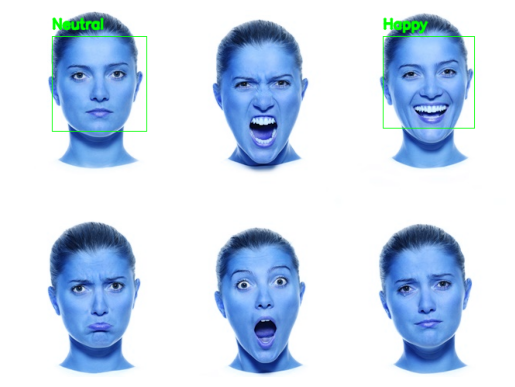

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


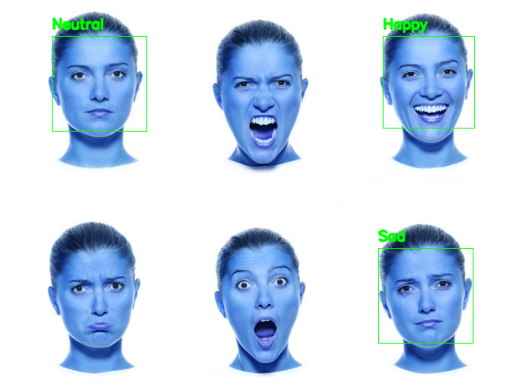

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


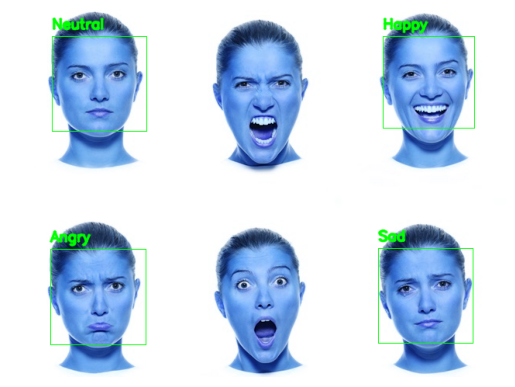

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


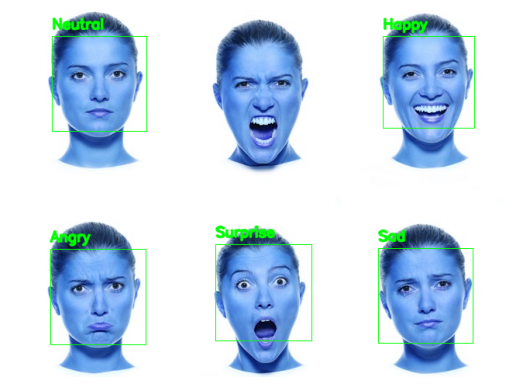

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


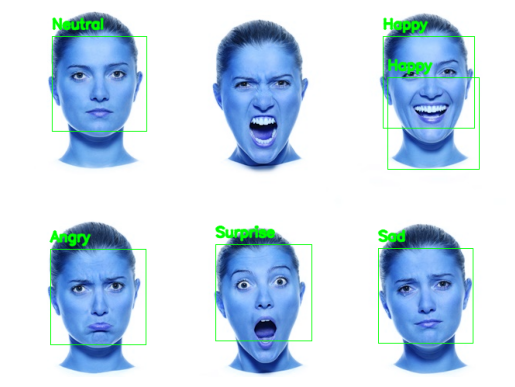

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


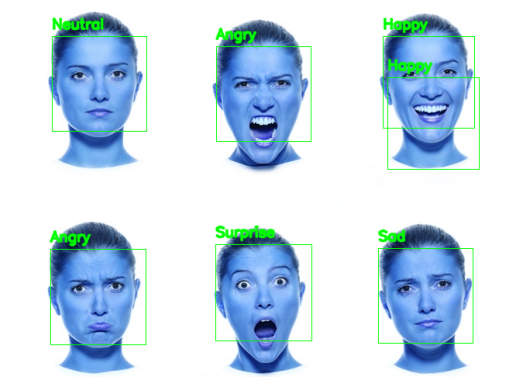

In [16]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

for (x, y, w, h) in deteccoes:

        cv2.rectangle(image, (x, y), (x + w, y + h), (0,255,0), 1)
        roi = image[y:y + h, x:x + w]
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)  # Преобразование в чёрно-белое
        roi_gray = cv2.resize(roi_gray, (48, 48))  # Изменение размера до 48x48
        roi_gray = np.expand_dims(roi_gray, axis=-1)  # Добавление канала
        roi_gray = roi_gray / 255.0  # Нормализация
        roi_gray = np.expand_dims(roi_gray, axis=0)  # Добавление измерения батча

        forecasts = model.predict(roi_gray) 

        cv2.putText(image, emotions[np.argmax(forecasts)], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)
        plt.imshow(image)
        plt.axis('off')
        plt.show()